<a href="https://colab.research.google.com/github/yayasoumah/deep-learning-daily-practice/blob/main/practical_coder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt


Files already downloaded and verified
Files already downloaded and verified


Train Dataset Lenght: 50000
Test Dataset Lenght: 10000


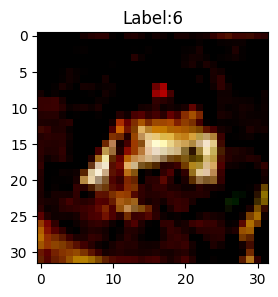

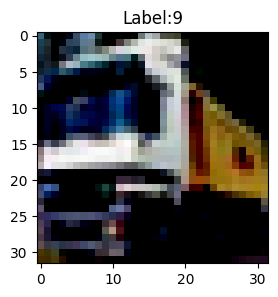

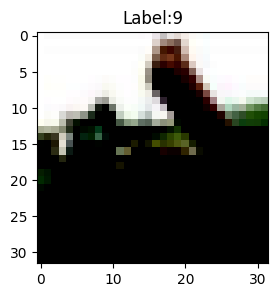

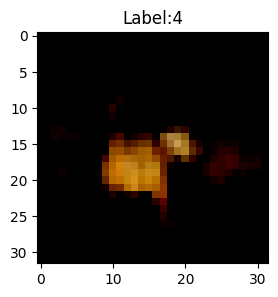

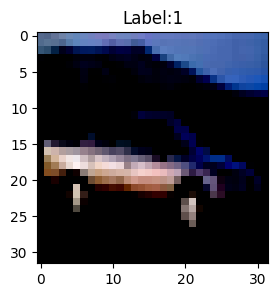

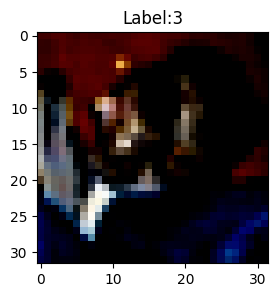

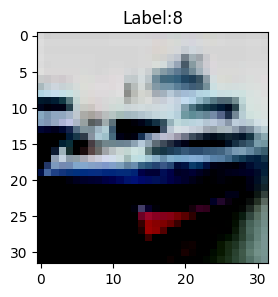

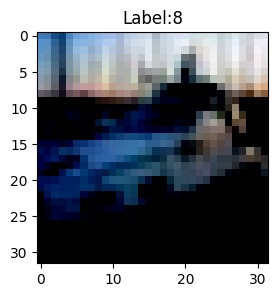

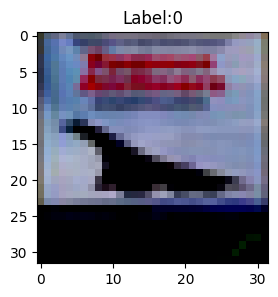

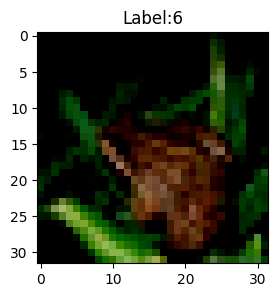

In [15]:
# defining the model architecture
class MyFirstModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10))

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)  # Apply the linear layers to input 'x'
        return logits

# load and normmalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

# trainind dataset
trainset = datasets.CIFAR10(root='./data/trainset',
                            download=True, train=True,
                            transform=transform)

# test dataset
testset  = datasets.CIFAR10(root='./data/testset',
                            download=True, train=False,
                            transform=transform)
# printing the dataset lenght
print('Train Dataset Lenght:',len(trainset))
print('Test Dataset Lenght:', len(testset))

# Visualizing a few sample data points
def show_samples(dataset, num_samples=5):
  for i in range(num_samples):
    image, label = dataset[i]
    plt.figure(figsize=(3,3))
    plt.imshow(image.permute(1,2,0))
    plt.title(f'Label:{label}')
    plt.show()

show_samples(trainset, num_samples=5)

show_samples(testset, num_samples=5)


In [16]:
# setting the DataLoader
trainloader = DataLoader(trainset,batch_size=4,shuffle=True)

testloader  = DataLoader(testset,batch_size=4,shuffle=True)

model = MyFirstModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


# Train the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)  # Corrected this line
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')





[1,  2000] loss: 1.902
[1,  4000] loss: 1.710
[1,  6000] loss: 1.629
[1,  8000] loss: 1.580
[1, 10000] loss: 1.561
[1, 12000] loss: 1.518
[2,  2000] loss: 1.435
[2,  4000] loss: 1.431
[2,  6000] loss: 1.421
[2,  8000] loss: 1.391
[2, 10000] loss: 1.389
[2, 12000] loss: 1.383
[3,  2000] loss: 1.272
[3,  4000] loss: 1.285
[3,  6000] loss: 1.293
[3,  8000] loss: 1.295
[3, 10000] loss: 1.293
[3, 12000] loss: 1.289
[4,  2000] loss: 1.185
[4,  4000] loss: 1.175
[4,  6000] loss: 1.199
[4,  8000] loss: 1.182
[4, 10000] loss: 1.195
[4, 12000] loss: 1.214
[5,  2000] loss: 1.090
[5,  4000] loss: 1.107
[5,  6000] loss: 1.093
[5,  8000] loss: 1.119
[5, 10000] loss: 1.131
[5, 12000] loss: 1.096
[6,  2000] loss: 0.988
[6,  4000] loss: 1.014
[6,  6000] loss: 1.036
[6,  8000] loss: 1.017
[6, 10000] loss: 1.068
[6, 12000] loss: 1.048
[7,  2000] loss: 0.889
[7,  4000] loss: 0.927
[7,  6000] loss: 0.949
[7,  8000] loss: 0.969
[7, 10000] loss: 0.959
[7, 12000] loss: 0.974
[8,  2000] loss: 0.791
[8,  4000] 

In [17]:
# Set the model to evaluation mode
model.eval()

# Initialize variables to keep track of correct predictions and total examples
correct = 0
total = 0

# Create lists to store predicted and true labels (optional)
predicted_labels = []
true_labels = []

# Disable gradient calculation for evaluation (saves memory and computation)
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)

        # Optionally, you can store the predicted and true labels for further analysis
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

Accuracy on the test dataset: 54.93%
